In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


(3687L,)
Train RMSE for  work_flow_0
0.0429753502075
Test RMSE for  work_flow_0
0.0432797948994


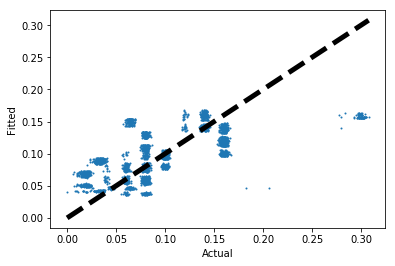

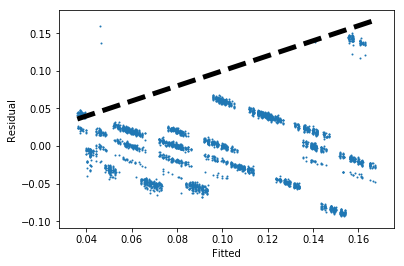

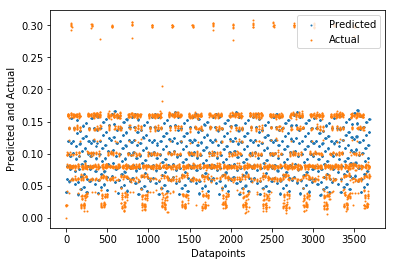

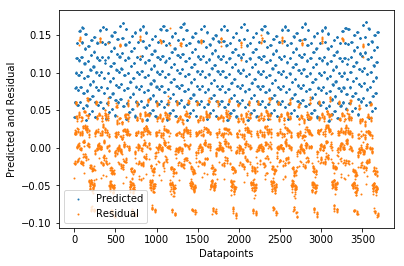

(3600L,)
Train RMSE for  work_flow_1
0.159588613416
Test RMSE for  work_flow_1
0.160866897874


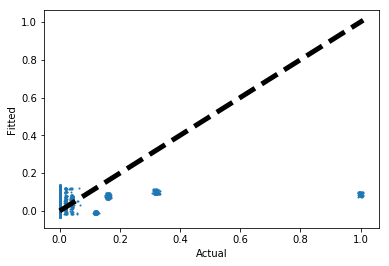

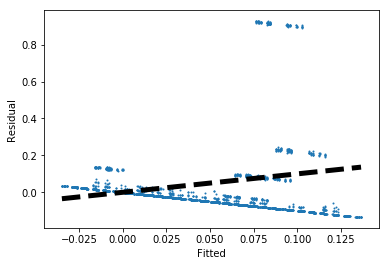

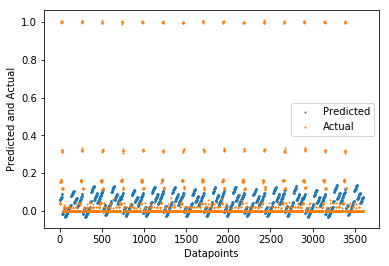

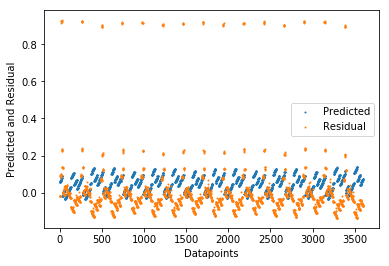

(3741L,)
Train RMSE for  work_flow_2
0.0422368374392
Test RMSE for  work_flow_2
0.0423899431949


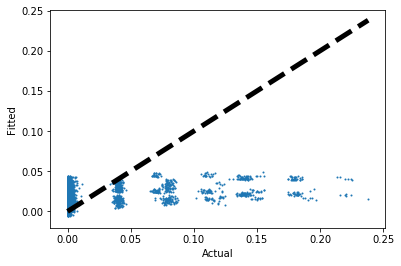

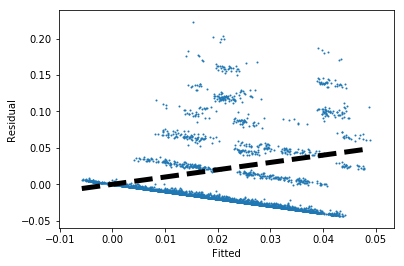

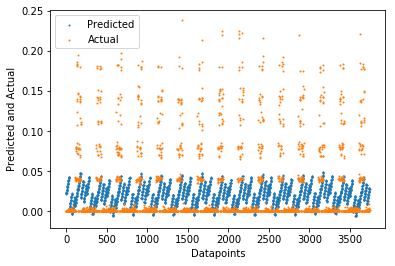

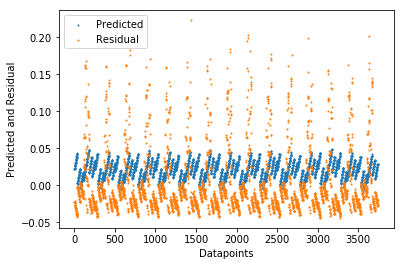

(3780L,)
Train RMSE for  work_flow_3
0.00711721308856
Test RMSE for  work_flow_3
0.00713018372534


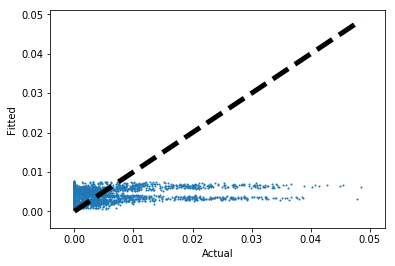

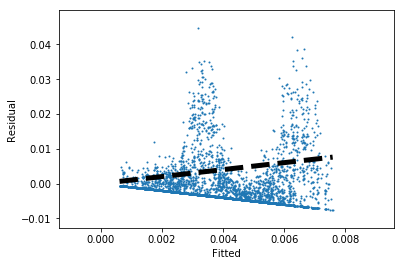

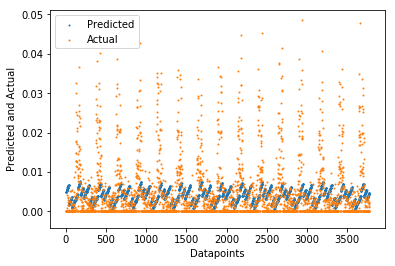

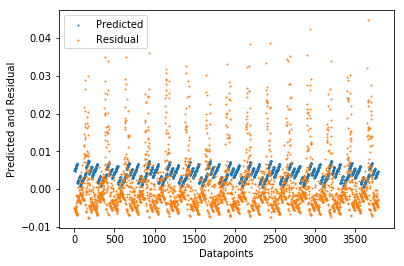

(3780L,)
Train RMSE for  work_flow_4
0.102994844158
Test RMSE for  work_flow_4
0.103584897179


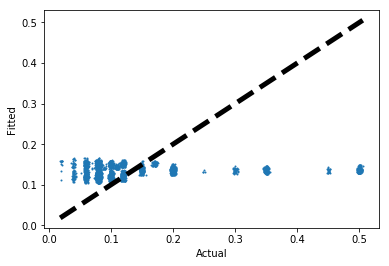

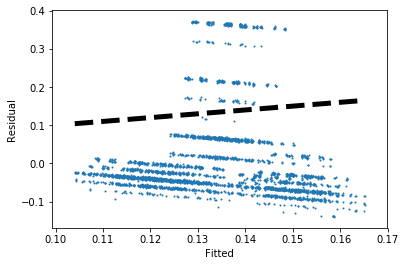

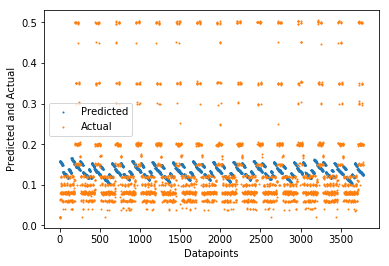

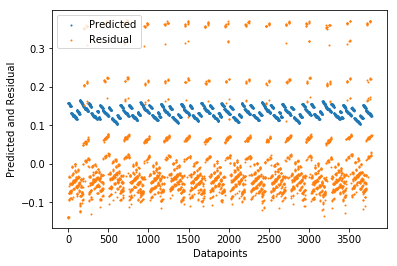

In [73]:
#Ques 2d-(i)
from sklearn import linear_model, preprocessing
from sklearn.model_selection import KFold, cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error
from math import sqrt

df=pd.read_csv('network_backup_dataset.csv')

def getScalarEncoding(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    new_cat_features = enc.transform(cat_features)
    return new_cat_features # [1 2 0]

def plot_d(A,B1,B2,Alabel,B1label,B2label):
    plt.scatter(x=A, y=B1,s=1)
    plt.scatter(x=A, y=B2,s=1)
    plt.xlabel(Alabel)
    plt.ylabel(B1label+' and '+B2label)
    plt.legend([B1label,B2label])
    plt.show()
    
kf = KFold(n_splits = 10, random_state=31)

for wf, wf_data in df.groupby("Work-Flow-ID"):
    X = wf_data.ix[:, [0,1,2,3,4]].values
    
    for i in range(0,5,1):
        X[:,i]=getScalarEncoding(X[:, i])
    
    y = wf_data.ix[:, 5].values
    lr = linear_model.LinearRegression()
    y_pred = cross_val_predict(lr, X, y, cv=10)
    y_res = y-y_pred
    #print y_res.shape
    res = cross_validate(lr, X, y, cv=10, scoring=('neg_mean_squared_error'), return_train_score = True)
    
    print "Train RMSE for ", wf
    print sqrt(abs(np.mean(res['train_score'])))
    print "Test RMSE for ", wf
    print sqrt(abs(np.mean(res['test_score'])))
    
    plt.scatter(x=y, y=y_pred,s=1)
    plt.plot([y.min(), y.max()], [y.min(), y.max()],  'k--', lw=5)
    plt.xlabel('Actual')
    plt.ylabel('Fitted')
    plt.show()
    
    plt.scatter(x=y_pred,y= y_res,s=1)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()],  'k--', lw=5)
    plt.xlabel('Fitted')
    plt.ylabel('Residual')
    plt.show()
    
    datapoints = range(1,y_pred.shape[0]+1)
    plot_d(datapoints,y_pred,y,'Datapoints','Predicted','Actual')
    plot_d(datapoints,y_pred,y_res,'Datapoints','Predicted','Residual')
    
    

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys



work_flow_0
Train RMSE for  7  -  work_flow_0 : 0.00873751047427
Test RMSE for  7  -  work_flow_0 : 0.0126555961598


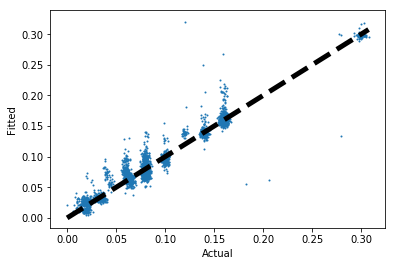

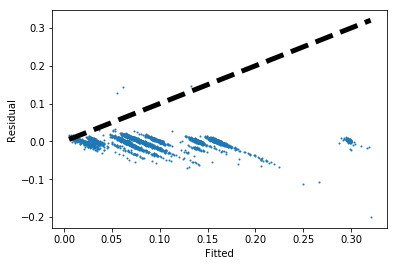

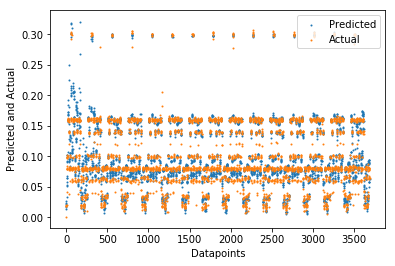

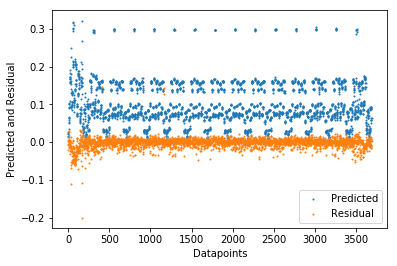


work_flow_1
Train RMSE for  7  -  work_flow_1 : 0.0569245329253
Test RMSE for  7  -  work_flow_1 : 0.0617062469025


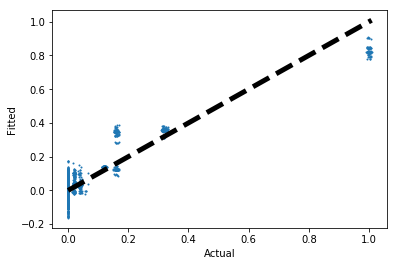

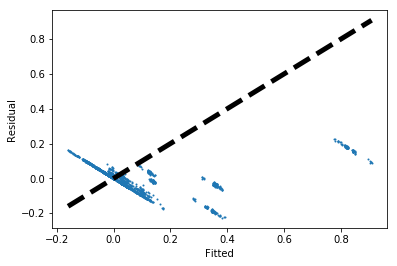

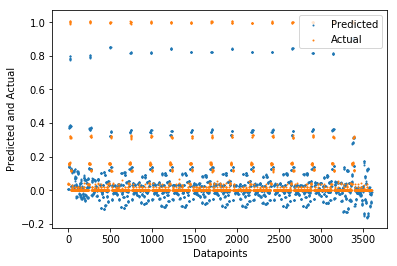

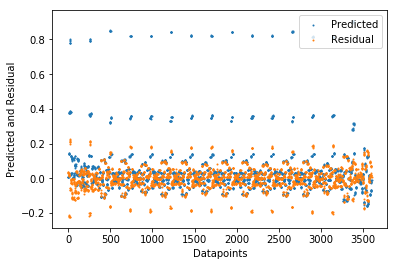


work_flow_2
Train RMSE for  6  -  work_flow_2 : 0.0234924273738
Test RMSE for  6  -  work_flow_2 : 0.0258836486055


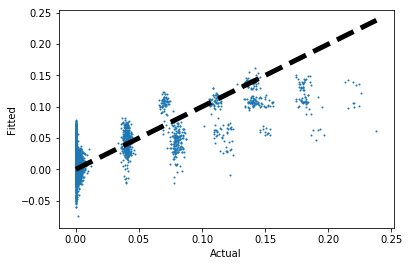

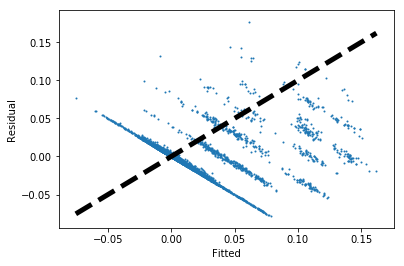

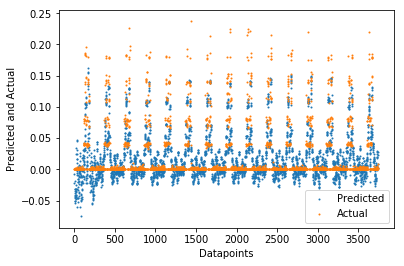

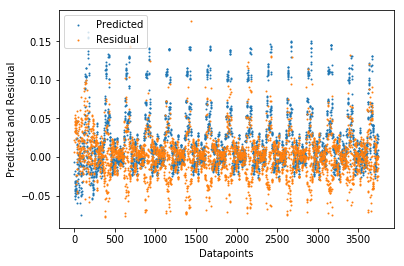


work_flow_3
Train RMSE for  5  -  work_flow_3 : 0.00524558192077
Test RMSE for  5  -  work_flow_3 : 0.00547445267592


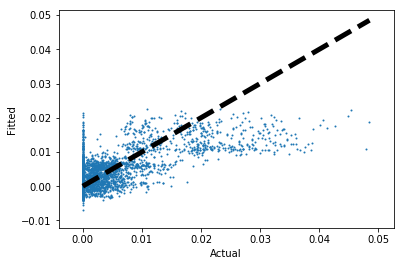

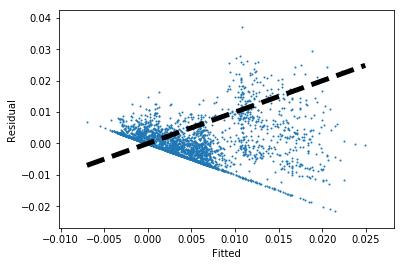

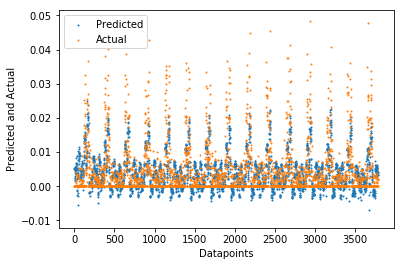

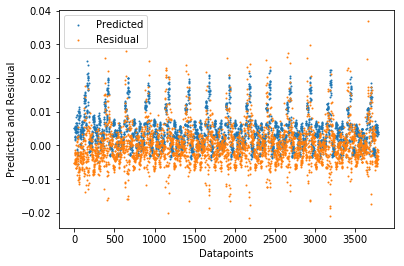


work_flow_4
Train RMSE for  8  -  work_flow_4 : 0.022085927946
Test RMSE for  8  -  work_flow_4 : 0.0309247232406


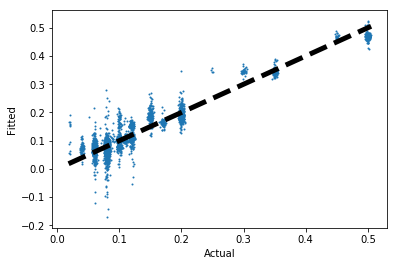

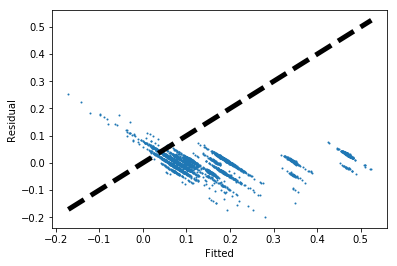

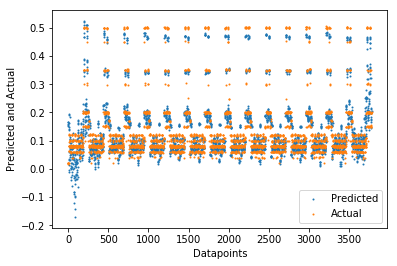

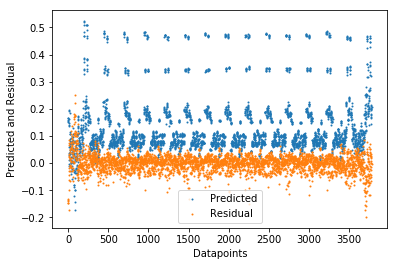

In [89]:
#Ques2d-(ii)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

bestdeg = [7,7,6,5,8]
index = 0
for wf, wf_data in df.groupby("Work-Flow-ID"):
    X = wf_data.ix[:, [0,1,2,3,4]].values
    print "\n", wf
    for i in range(0,5,1):
        X[:,i]=getScalarEncoding(X[:, i])
    
    y = wf_data.ix[:, 5].values
    degrees = range(1,11)
    trainrmse = []
    testrmse = []
    
    for deg in degrees:
        poly = PolynomialFeatures(degree= deg)
        lr = linear_model.LinearRegression()

        pipeline = make_pipeline(poly, lr)
        y_pred = cross_val_predict(pipeline, X, y, cv=10)
        y_res = y-y_pred
        
        res = cross_validate(pipeline, X, y, cv=10, scoring=('neg_mean_squared_error'), return_train_score = True)
        print "Train RMSE for ", deg, " - ", wf
        err1 = sqrt(abs(np.mean(res['train_score'])))
        trainrmse.append(err1)
        print "Test RMSE for ", deg, " - ", wf
        err2 = sqrt(abs(np.mean(res['test_score'])))
        testrmse.append(err2)
    
    plt.xlabel("Degree of polynomial")
    plt.ylabel("Average RMSE")
    plt.title("Average RMSE vs polynomial degree for " + wf)
    plt.plot(degrees, trainrmse)
    plt.plot(degrees, testrmse)
    plt.legend(["Avg train RMSE", "Avg test RMSE"])
    plt.show()
    
    #running for best degree
    poly = PolynomialFeatures(degree= bestdeg[index])
    lr = linear_model.LinearRegression()
    pipeline = make_pipeline(poly, lr)
    y_pred = cross_val_predict(pipeline, X, y, cv=10)
    y_res = y-y_pred
        
    res = cross_validate(pipeline, X, y, cv=10, scoring=('neg_mean_squared_error'), return_train_score = True)
    
    err1 = sqrt(abs(np.mean(res['train_score'])))
    err2 = sqrt(abs(np.mean(res['test_score'])))
    print "Train RMSE for ", bestdeg[index], " - ", wf, ":", err1
    print "Test RMSE for ", bestdeg[index], " - ", wf, ":", err2
    index = index+1
    plt.scatter(x=y, y=y_pred,s=1)
    plt.plot([y.min(), y.max()], [y.min(), y.max()],  'k--', lw=5)
    plt.xlabel('Actual')
    plt.ylabel('Fitted')
    plt.show()
    
    plt.scatter(x=y_pred,y= y_res,s=1)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()],  'k--', lw=5)
    plt.xlabel('Fitted')
    plt.ylabel('Residual')
    plt.show()
    
    datapoints = range(1,y_pred.shape[0]+1)
    plot_d(datapoints,y_pred,y,'Datapoints','Predicted','Actual')
    plot_d(datapoints,y_pred,y_res,'Datapoints','Predicted','Residual')
    
    

-------------------k= 1 --------------------
Train RMSE : 0.0
Test RMSE : 0.0794600209468
-------------------k= 2 --------------------
Train RMSE : 0.0400473081207
Test RMSE : 0.0745085274394
-------------------k= 3 --------------------
Train RMSE : 0.0368189871639
Test RMSE : 0.0719533249282
-------------------k= 4 --------------------
Train RMSE : 0.0369416697868
Test RMSE : 0.0720168969734
-------------------k= 5 --------------------
Train RMSE : 0.038230422241
Test RMSE : 0.0721250944908
-------------------k= 6 --------------------
Train RMSE : 0.0392335079904
Test RMSE : 0.0729296046187
-------------------k= 7 --------------------
Train RMSE : 0.0402942863917
Test RMSE : 0.0729763293734
-------------------k= 8 --------------------
Train RMSE : 0.0430072355187
Test RMSE : 0.0734956557248
-------------------k= 9 --------------------
Train RMSE : 0.0461080401429
Test RMSE : 0.074549028526
-------------------k= 10 --------------------
Train RMSE : 0.049248796084
Test RMSE : 0.07523704

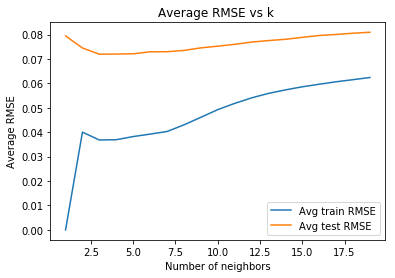

Train RMSE : 0.0368189871639
Test RMSE : 0.0719533249282


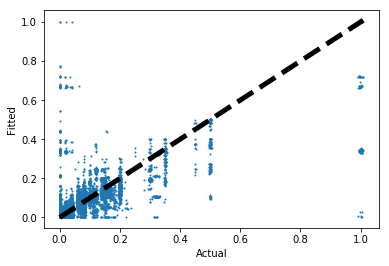

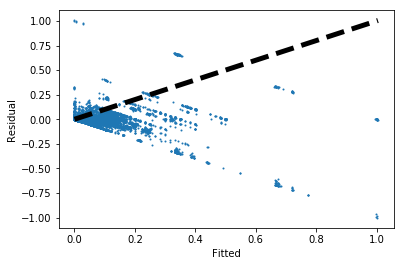

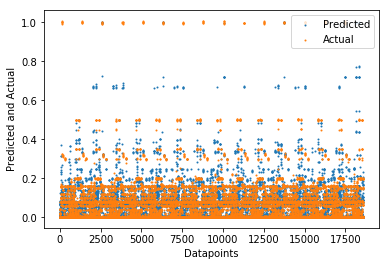

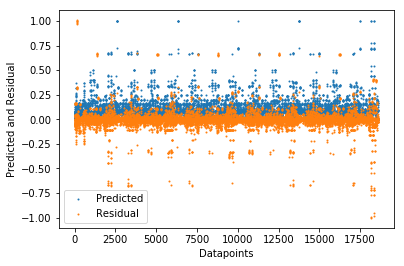

In [98]:
#Ques 2e
from sklearn.neighbors import KNeighborsRegressor

trainrmse = []
testrmse = []
kvals = range(1,20)
X = df.ix[:, [0,1,2,3,4]].values
    
for i in range(0,5,1):
    X[:,i]=getScalarEncoding(X[:, i])
    
y = df.ix[:, 5].values
    
for k in kvals:
    print "-------------------k=", k,"--------------------"
    
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=10)
    y_res = y-y_pred
    #print y_res.shape
    res = cross_validate(knn, X, y, cv=10, scoring=('neg_mean_squared_error'), return_train_score = True)
    
    err1 = sqrt(abs(np.mean(res['train_score'])))
    err2 = sqrt(abs(np.mean(res['test_score'])))
    print "Train RMSE :", err1
    print "Test RMSE :", err2
    trainrmse.append(err1)
    testrmse.append(err2)


plt.xlabel("Number of neighbors")
plt.ylabel("Average RMSE")
plt.title("Average RMSE vs k ")
plt.plot(kvals, trainrmse)
plt.plot(kvals, testrmse)
plt.legend(["Avg train RMSE", "Avg test RMSE"])
plt.show()

#best parameter
knn = KNeighborsRegressor(n_neighbors=3)
y_pred = cross_val_predict(knn, X, y, cv=10)
y_res = y-y_pred
#print y_res.shape
res = cross_validate(knn, X, y, cv=10, scoring=('neg_mean_squared_error'), return_train_score = True)

err1 = sqrt(abs(np.mean(res['train_score'])))
err2 = sqrt(abs(np.mean(res['test_score'])))
print "Train RMSE :", err1
print "Test RMSE :", err2

plt.scatter(x=y, y=y_pred,s=1)
plt.plot([y.min(), y.max()], [y.min(), y.max()],  'k--', lw=5)
plt.xlabel('Actual')
plt.ylabel('Fitted')
plt.show()

plt.scatter(x=y_pred,y= y_res,s=1)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()],  'k--', lw=5)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.show()

datapoints = range(1,y_pred.shape[0]+1)
plot_d(datapoints,y_pred,y,'Datapoints','Predicted','Actual')
plot_d(datapoints,y_pred,y_res,'Datapoints','Predicted','Residual')

